# 任务4 基于车牌识别算法实现车牌号码识别

## 职业能力目标

- 了解车牌识别在生活当中的应用场景；
- 掌握利用OpenCV实现图像的采集；
- 掌握调用算法接口，进行车牌识别；
- 理解如何使用多线程的方式实现图像采集和车牌号码识别。

## 任务描述

本实验将实现用车牌识别算法库对USB摄像头实时采集的画面进行车牌识别。

## 任务要求

- 使用RockX车牌识别算法库检测车牌；
- 使用RockX车牌识别算法库对齐车牌；
- 使用RockX车牌识别算法库识别车牌;
- 使用draw_text方法在图像上添加文字信息;
- 使用多线程识别车牌。

## 任务实施

## 1. 车牌检测实验

### 1.1 车牌应用场景

  车牌识别在高速公路车辆管理中得到广泛应用，电子收费(ETC)系统中，也是结合DSRC技术识别车辆身份的主要手段。
  
　在停车场管理中，车牌识别技术也是识别车辆身份的主要手段。
 
  在深圳市公安局建设的《停车库(场)车辆图像和号牌信息采集与传输系统技术要求》中，车牌识别技术成为车辆身份识别的主要手段。
  
　车牌识别技术结合电子不停车收费系统(ETC)识别车辆，过往车辆通过道口时无须停车，
 
  即能够实现车辆身份自动识别、自动收费。在车场管理中，为提高出入口车辆通行效率，
  
  车牌识别针对无需收停车费的车辆(如月卡车、内部免费通行车辆)，建设无人值守的快速通道，免取卡、不停车的出入体验，
  
  正改变出入停车场的管理模式。

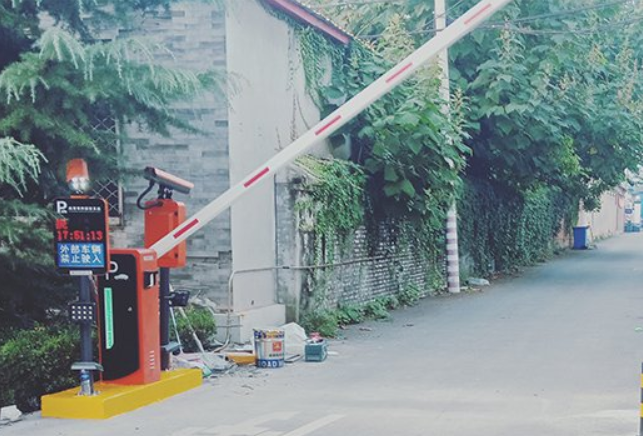

### 1.2 调用车牌识别算法接口

rockx车牌识别库是集成在核心开发板上的一套python的接口库，可以直接调用

下面是可识别的车牌字符表

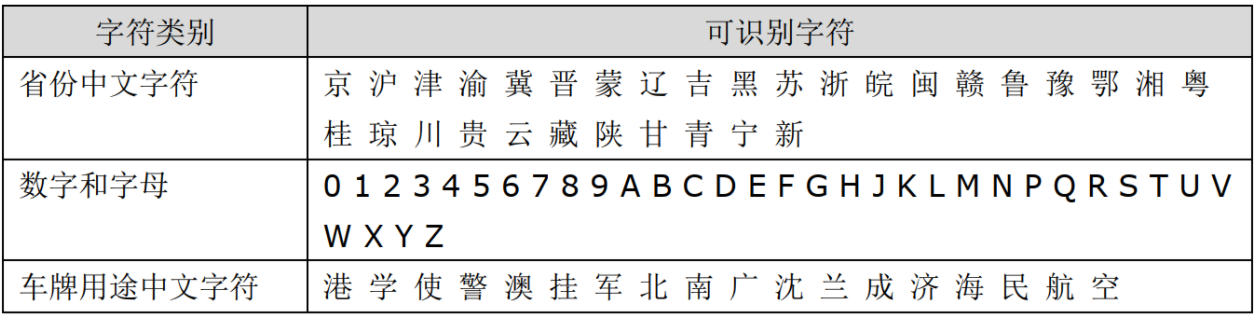

#### 1.2.1 导入相关的库

In [ ]:
import time
import cv2      # 引入opencv图像处理库
from rockx import RockX  # 引入车牌识别算法接口库
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库
from lib.ft2 import ft  # 中文描绘库

#### 1.2.2 实例化算法接口对象

在RockX库中，包含了算法各种功能模式，这里采用车牌的检测，对齐，和识别的功能模式

- `RockX(RockX.ROCKX_MODULE_CARPLATE_DETECTION)` 是车牌检测功能的接口对象
- `RockX(RockX.ROCKX_MODULE_CARPLATE_ALIGN)` 是车牌对齐功能的接口对象
- `RockX(RockX.ROCKX_MODULE_CARPLATE_RECOG)` 是车牌识别功能的接口对象

In [ ]:
carplate_det_handle = RockX(RockX.ROCKX_MODULE_CARPLATE_DETECTION) # 检测
carplate_align_handle = RockX(RockX.ROCKX_MODULE_CARPLATE_ALIGN)  # 对齐
carplate_recog_handle = RockX(RockX.ROCKX_MODULE_CARPLATE_RECOG)  # 识别

#### 1.2.3 加载图片数据

使用已经保存在当前路径下的车牌图片

In [ ]:
image_car = cv2.imread("./exp/car.jpg")

#### 1.2.4 打印原始的照片

In [ ]:
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image_car)[1].tobytes() # 把图像值转成byte类型的值

#### 1.2.5 获取图片信息

获取图片的长，宽和通道数

In [ ]:
in_img_h, in_img_w, bytesPerComponent = image_car.shape

#### 1.2.6 调用车牌识别主函数接口

为了获取车牌框的位置，调用车牌检测函数，通过对图像的检测，识别车牌的的位置信息
```
rockx_carplate_detect(self, in_img, width, height, pixel_fmt)
```
**参数说明：**
- in_img: 输入图片(numpy ndarray)
- width: 图片宽
- height: 图片高
- pixel_fmt: 图片 pixel format
**返回值说明：**
- ret: 状态码, 0为成功，其他失败
- results: RockX对象的列表，就是说一张图可能包含多个车牌对象，每个对象包含了车牌的位置框信息等

### <font color=red size=3>动手练习1</font>

在`<1>`处填写代码，利用`carplate_det_handle.rockx_carplate_detect`函数，识别车牌

参数分别为`image_car`,`in_img_w`,`in_img_h`,`RockX.ROCKX_PIXEL_FORMAT_BGR888`

**填写完成后执行代码，输出类似如下的结果，则填写正确。**

`0 [Object(id=0, cls_idx=0, box=Rect(left=64, top=184, right=371, bottom=280), score=0.999495804309845)]`

In [ ]:
ret, results = <1>
print(ret, results)

<details>
<summary><font color=red size=3>点击查看动手练习1答案</font></summary>
<pre><code>

```python
ret, results = carplate_det_handle.rockx_carplate_detect(image_car, 
                                                         in_img_w, 
                                                         in_img_h,
                                                         RockX.ROCKX_PIXEL_FORMAT_BGR888)
print(ret, results)
```

</code></pre>
</details>

#### 1.2.7 调用车牌对齐函数

为了对车牌的图片的倾斜等，需要对车牌进行矫正对齐

调用车牌对齐函数，通过前面得到的车牌对象，把车牌对象的位置框信息作为输入，进行车牌的矫正对齐

这里只使用单个车牌（results[0]）结果来做检测识别

```
rockx_carplate_align(self, in_img, width, height, pixel_fmt, in_box)
```
**参数说明：**
- in_img: 输入图片(numpy ndarray)
- width: 图片宽
- height: 图片高
- pixel_fmt: 图片 pixel format
- in_box: 车牌检测后的车牌框
**返回值说明：**
- ret: 状态码，0为成功，其他失败
- align_result: 返回对齐后的结果对象，主要包含对齐后的图片数据信息

### <font color=red size=3>动手练习2</font>

在`<1>`处填写代码，利用` carplate_align_handle.rockx_carplate_align`函数，将车牌对齐

参数分别为`image_car`,`in_img_w`,`in_img_h`,`RockX.ROCKX_PIXEL_FORMAT_BGR888`,`results[0].box`

**填写完成后执行代码，输出类似如下的结果，则填写正确。**

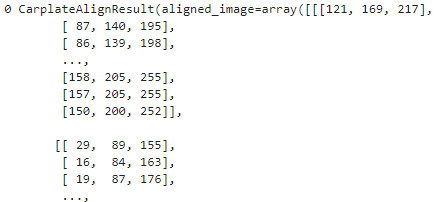

In [ ]:
ret, align_result = <1>
print(ret, align_result)

<details>
<summary><font color=red size=3>点击查看动手练习2答案</font></summary>
<pre><code>

```python
ret, align_result = carplate_align_handle.rockx_carplate_align(image_car, 
                                                               in_img_w, 
                                                               in_img_h,
                                                               RockX.ROCKX_PIXEL_FORMAT_BGR888,
                                                               results[0].box)
print(ret, align_result)
```

</code></pre>
</details>



#### 1.2.8 调用车牌识别函数

为了获取具体的车牌信息，调用车牌识别函数，针对矫正对齐后的图片数据结果，进行识别分析

```
rockx_carplate_recognize(self, in_aligned_img)
```
**参数说明：**
- in_aligned_img: 车牌对齐后的对象的图片数据（align_result.aligned_image）
**返回值说明：**
- ret: 状态码，0为成功，其他失败
- recog_result: 返回识别后的结果信息

In [ ]:
ret, recog_result = carplate_recog_handle.rockx_carplate_recognize(align_result.aligned_image)
print(ret, recog_result)

#### 1.2.9 画出车牌框，并绘制车牌号

#### (1). 利用OpenCV在图像上添加文字和画出人脸框

`cv2.rectangle()`的作用是根据坐标，描绘一个简单的矩形边框参数依次为：图片，左上角右下角位置坐标，线条颜色，线条粗细

`
cv2.rectangle(image, pt1=(int(left), int(top)), pt2=(int(right), int(bot)), color=(0, 255, 0), thickness=3)
`

#### （2）引入中文绘画库

用于在图片上描绘中文字符
```
from lib.ft2 import ft
```
`ft.draw_text`的作用是在图片的某个位置上添加文字信息，参数依次为，图片，位置，文字，字体大小，字体颜色
```
img = ft.draw_text(img, position, '{}'.format(plate_number), 34, (255, 0, 0))
```

### <font color=red size=3>动手练习3</font>

在`<1>`处使用`cv2.rectangle()`方法在`image_car`图片上绘制框

- 参数`image`设置为`image_car`

- 参数`pt1`,`pt2`分别设置为两个坐标点

- 参数`color`设置为`(0, 255, 0)`

- 参数`thickness`设置为`3`


**完成后能够成功执行后续显示图片的代码，绘制出车牌边界框和车牌号码，则说明填写正确**

In [ ]:
if recog_result is not None:
    <1>
    image_car = ft.draw_text(image_car, (results[0].box.left, results[0].box.top - 50),
                        '{}'.format(recog_result), 34, (0, 0, 255))

<details>
<summary><font color=red size=3>点击查看动手练习3答案</font></summary>
<pre><code>

```python
if recog_result is not None:
    cv2.rectangle(image_car, (results[0].box.left, results[0].box.top), 
                  (results[0].box.right, results[0].box.bottom),
                  (0, 255, 0), 2)
    image_car = ft.draw_text(image_car, (results[0].box.left, results[0].box.top - 50),
                        '{}'.format(recog_result), 34, (0, 0, 255))
```

</code></pre>
</details>

#### 1.2.10 将经过算法处理的图像显示

利用jupyter的画图库和显示库，来显示获取的图片

In [ ]:
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image_car)[1].tobytes() # 把图像值转成byte类型的值

### <font color=red size=3>动手练习4</font>

尝试利用图片`car1.jpg`，从头进行进行车牌识别实验

**完成后能够成功绘制出车牌边界框和车牌号码，则说明填写正确**

In [ ]:
<1>

<details>
<summary><font color=red size=3>点击查看动手练习4答案</font></summary>
<pre><code>

```python
image_car = cv2.imread("./exp/car1.jpg")
in_img_h, in_img_w, bytesPerComponent = image_car.shape
ret, results = carplate_det_handle.rockx_carplate_detect(
    image_car, in_img_w, in_img_h, RockX.ROCKX_PIXEL_FORMAT_BGR888)
ret, align_result = carplate_align_handle.rockx_carplate_align(
    image_car, in_img_w, in_img_h, RockX.ROCKX_PIXEL_FORMAT_BGR888, results[0].box)
ret, recog_result = carplate_recog_handle.rockx_carplate_recognize(align_result.aligned_image)
if recog_result is not None:
    cv2.rectangle(image_car, (results[0].box.left, results[0].box.top), 
                  (results[0].box.right, results[0].box.bottom),
                  (0, 255, 0), 2)
    image_car = ft.draw_text(image_car, (results[0].box.left, results[0].box.top - 50),
                        '{}'.format(recog_result), 34, (0, 0, 255))
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image_car)[1].tobytes() # 把图像值转成byte类型的值)
```

</code></pre>
</details>

In [ ]:
# 释放资源
carplate_recog_handle.release()
carplate_align_handle.release()
carplate_det_handle.release()

### 1.3 利用多线程方式实现视频流的车牌识别

利用多线程，使图像采集和算法识别同时运行，从而实现视频流的车牌识别，并且可以避免一些因花时间太久，导致的视频卡顿

#### 1.3.1 引入相关的库

#### threading线程库

多线程类似于同时执行多个不同程序，多线程运行有如下优点：

- 使用线程可以把占据长时间的程序中的任务放到后台去处理。
- 用户界面可以更加吸引人，比如用户点击了一个按钮去触发某些事件的处理，可以弹出一个进度条来显示处理的进度。
- 程序的运行速度可能加快。
- 在一些等待的任务实现上如用户输入、文件读写和网络收发数据等，线程就比较有用了。在这种情况下我们可以释放一些珍贵的资源如内存占用等等。

每个独立的线程有一个程序运行的入口、顺序执行序列和程序的出口。

但是线程不能够独立执行，必须依存在应用程序中，由应用程序提供多个线程执行控制。

In [ ]:
import time   # 时间库
import cv2      # 引入opencv图像处理库
from lib.ft2 import ft   # 中文描绘库
import threading   # 这是python的标准库，线程库
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库
from rockx import RockX  # 引入算法库

#### 1.3.2 定义摄像头采集线程

结合上面的`opencv`采集图像的内容，利用多线程的方式串起来，形成一个可传参，可调用的通用类。

这里定义了一个全局变量`camera_img`，用作存储获取的图片数据，以便于其他线程可以调用

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，打开摄像头，并设置分辨率

- `run`函数

该函数是在实例化后，执行`start`启动函数的时候，会自动执行。在该函数里，实现了循环获取图像的内容

In [ ]:
class CameraThread(threading.Thread):
    def __init__(self, camera_id, camera_width, camera_height):
        threading.Thread.__init__(self)
        self.working = True
        self.cap = cv2.VideoCapture(camera_id)  # 打开摄像头
        self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, camera_width)  # 设置摄像头分辨率宽度
        self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, camera_height)  # 设置摄像头分辨率高度
        
    def run(self):
        global camera_img     # 定义一个全局变量，用于存储获取的图片，以便于算法可以直接调用
        camera_img = None
        while self.working:
            ret, image = self.cap.read()  # 获取新的一帧图片
            if ret:
                camera_img = image
            
    def stop(self):
        self.working = False
        self.cap.release()

#### 1.3.3 定义算法识别线程

结合调用算法接口的内容和图像显示内容，利用多线程的方式整合起来，循环识别，

对摄像头采集线程中获取的每一帧图片进行识别，并显示，形成视频流的画面

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，定义了显示内容，并实例化车牌识别

- `run`函数

该函数是在实例化后，执行`start`启动函数的时候，会自动执行。

在该函数是一个循环，实现了对采集的每一帧图片进行算法识别，然后将结果绘画在图片上，并将处理后的图片显示出来

In [ ]:
class PlateDetectThread(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
        self.working = True
        self.running = False
        
        # 实例化车牌相关算法
        self.carplate_det_handle = RockX(RockX.ROCKX_MODULE_CARPLATE_DETECTION)
        self.carplate_align_handle = RockX(RockX.ROCKX_MODULE_CARPLATE_ALIGN)
        self.carplate_recog_handle = RockX(RockX.ROCKX_MODULE_CARPLATE_RECOG)
        
        self.imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
        display(self.imgbox)  # 将盒子显示出来
        
    def run(self):
        self.running = True
        # 显示图像，把摄像头线程采集到的数据，全局变量camera_img，转换后，装在在盒子里，全局变量是不断更新的
        while self.working:
            try:
                if camera_img is not None:
                    limg = camera_img   # 获取全局变量图像值
                    in_img_h, in_img_w, bytesPerComponent = limg.shape
                    ret, results = self.carplate_det_handle.rockx_carplate_detect(
                        limg, in_img_w, in_img_h, RockX.ROCKX_PIXEL_FORMAT_BGR888)
                    for result in results:
                        ret, align_result = self.carplate_align_handle.rockx_carplate_align(
                            limg, in_img_w, in_img_h, RockX.ROCKX_PIXEL_FORMAT_BGR888, result.box)
                        if align_result is not None:
                            ret, recog_result = self.carplate_recog_handle.rockx_carplate_recognize(align_result.aligned_image)
                            if recog_result is not None:
                                plate_number = recog_result
                                cv2.rectangle(limg,
                                      (result.box.left, result.box.top),
                                      (result.box.right, result.box.bottom),
                                      (0, 255, 0), 2)
                                if (result.box.top - 50) > 0:
                                    limg = ft.draw_text(limg, (result.box.left, result.box.top - 50), 
                                                    '{}'.format(plate_number), 34, (0, 0, 255))
                                else:
                                    limg = ft.draw_text(limg, (result.box.left, result.box.bottom), 
                                                    '{}'.format(plate_number), 34, (0, 0, 255))
                    self.imgbox.value = cv2.imencode('.jpg', limg)[1].tobytes() # 把图像值转成byte类型的值
            except Exception as e:
                pass
        self.running = False
            
    def stop(self):
        self.working = False
        while self.running:
            pass
        self.carplate_recog_handle.release()
        self.carplate_align_handle.release()
        self.carplate_det_handle.release()

#### 1.3.4 调用两个线程，启动视频流的车牌识别

实例化两个线程，并启动这两个线程，实现完整的车牌识别功能，运行时，加载模型比较久，需要等待几秒

In [ ]:
camera_th = CameraThread(0, 640, 480)
plate_detect_th = PlateDetectThread()

camera_th.start()
plate_detect_th.start()

#### 1.3.5 停止线程

为了避免占用资源，需要停止摄像头采集线程和算法识别线程，或者重启内核

In [ ]:
plate_detect_th.stop()
camera_th.stop()

## 任务小结

本次实验的收获：

- 了解了车牌识别应用在生活当中的应用场景；
- 学会了使用多线程的方式，并调用算法接口实现实时车牌识别。